In [7]:
# %load font.py
#!/usr/bin/env python

# In[ ]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결



In [1]:
#분석할 데이터 불러오기 
import pandas as pd
df = pd.read_csv('data/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
#horsepower를 구간으로 나누어 분석, 데이터 타입 object -> float
# df['horsepower'] = df['horsepower'].astype('float') # ?를 찾음
#?를 NaN 처리 후 행 삭제
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [6]:
#np.histogram으로 경계 값 리스트를 만듦(bins는 구간 나누는 수)
import numpy as np
count, bin_value = np.histogram(df['horsepower'], bins=3) 
print(count, bin_value)

#구간의 이름을 부여
bin_names = ['저출력', '보통출력', '고출력']

#분석하고자 하는 자료에 bin_names 추가
df['hp_bin'] = pd.cut(x=df['horsepower'],  #처리할 데이터
                          bins=bin_value,    #경계 값 리스트
                        labels=bin_names,   #구간의 이름 리스트
                         include_lowest='True')
df

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,보통출력
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,저출력
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,저출력
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,저출력
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,저출력


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

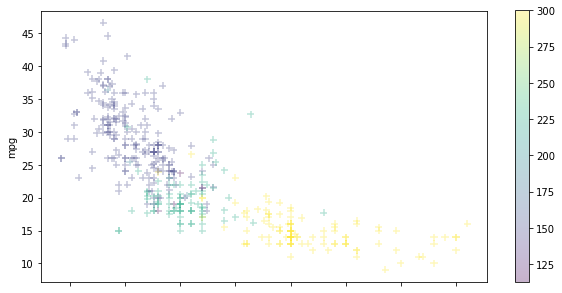

In [10]:
df.head()
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot(kind='scatter', x='horsepower', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)

In [12]:
#더미 변수 활용

hp_dummies = pd.get_dummies(df['hp_bin'], prefix='hp')
print(hp_dummies)
print()

df = pd.concat([df, hp_dummies], axis=0)
df.info()   #더미 변수 df에 삽입
df

     hp_저출력  hp_보통출력  hp_고출력
0         0        1       0
1         0        1       0
2         0        1       0
3         0        1       0
4         0        1       0
..      ...      ...     ...
393       0        0       0
394       0        0       0
395       0        0       0
396       0        0       0
397       0        0       0

[784 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 397
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    float64 
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    float64 
 7   origin        392 non-null    float64 
 8   name          392 non-null    object  
 9   hp_bin        392 non-null    ca

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin,hp_저출력,hp_보통출력,hp_고출력
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,보통출력,NaN,NaN,NaN
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,보통출력,NaN,NaN,NaN
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,보통출력,NaN,NaN,NaN
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,보통출력,NaN,NaN,NaN
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,보통출력,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [162]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
# titanic.alive.unique()
pd.get_dummies(titanic['alive'])

,no,yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,1,0
889,0,1


In [163]:
pd.get_dummies(titanic['alive'], drop_first=True)

,yes
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [164]:
ailve_yes = pd.get_dummies(titanic['alive'], prefix='alive', drop_first=True)
print(ailve_yes)
df1 = pd.concat([df, ailve_yes], axis=0)
df1

     alive_yes
0            0
1            1
2            1
3            1
4            0
..         ...
886          0
887          1
888          0
889          1
890          0

[891 rows x 1 columns]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,hp_bin,hp_저출력,hp_보통출력,hp_고출력,alive_yes
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,보통출력,NaN,NaN,NaN,NaN
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,보통출력,NaN,NaN,NaN,NaN
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,보통출력,NaN,NaN,NaN,NaN
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,보통출력,NaN,NaN,NaN,NaN
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,보통출력,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [10]:
#one_hot_encoding 으로 더미 변수 생성
from sklearn import preprocessing
#전처리를 위한 인코더 객체 생성
label_encoder = preprocessing.LabelEncoder() #label_encoder 인코더 생성
onehot_encoder = preprocessing.OneHotEncoder() #onehot_encoder 인코더 생성

#label_encoder로 문자열 함수를 숫자형 범주로 변환
onehot_label = label_encoder.fit_transform(df['hp_bin'])
print(onehot_label.ndim, onehot_label.dtype, onehot_label.size)

#2차원 배열로 변환
onehot_reshape = onehot_label.reshape(len(onehot_label), 1)
print(onehot_reshape.ndim, onehot_reshape.dtype, onehot_reshape.size)
onehot_reshape

#희소 행렬로ㅓ 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshape)
print(onehot_fitted)

1 int32 784
2 int32 784
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 2)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 1)	1.0
  (24, 2)	1.0
  :	:
  (759, 3)	1.0
  (760, 3)	1.0
  (761, 3)	1.0
  (762, 3)	1.0
  (763, 3)	1.0
  (764, 3)	1.0
  (765, 3)	1.0
  (766, 3)	1.0
  (767, 3)	1.0
  (768, 3)	1.0
  (769, 3)	1.0
  (770, 3)	1.0
  (771, 3)	1.0
  (772, 3)	1.0
  (773, 3)	1.0
  (774, 3)	1.0
  (775, 3)	1.0
  (776, 3)	1.0
  (777, 3)	1.0
  (778, 3)	1.0
  (779, 3)	1.0
  (780, 3)	1.0
  (781, 3)	1.0
  (782, 3)	1.0
  (783, 3)	1.0


In [167]:
#시계열 데이터 처리
df = pd.read_csv('data/stock-data.csv')

df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


In [171]:
df['new_Date'] = pd.to_datetime(df['Date'])
print(type(df['Date'][0]))
print(type(df['new_Date'][0]))
df

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,Date,Close,Start,High,Low,Volume,new_Date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19


In [13]:
#new_Date를 인덱스 컬럼으로 설정, Date 컬럼을 삭제
df.set_index(['new_Date'], inplace=True)
df.head()

df.drop('Date', axis=1, inplace=True)
df.head()

,Close,Start,High,Low,Volume
new_Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


In [14]:
ts_ms = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)
print(ts_ms)
print('\n')

# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2019-01-01', periods=6, 
                   freq='M',              # 시간 간격 (M: 월의 마지막 날)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_me)
print('\n')

# 분기(3개월) 간격, 월의 마지막 날 기준
ts_3m = pd.date_range('2019-01-01', periods=6, 
                   freq='3M',             # 시간 간격 (3M: 3개월)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_3m)

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')


DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')


DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


In [175]:
# Period 배열 만들기 - 1개월 길이
pr_m = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='M')                   # 기간의 길이 (M: 월)
print(pr_m)
print('\n')

# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='H')                   # 기간의 길이 (H: 시간)
print(pr_h)
print('\n')

# Period 배열 만들기 - 2시간 길이
pr_2h = pd.period_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='2H')                  # 기간의 길이 (H: 시간)
print(pr_2h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


In [176]:
#날짜 데이터 분리 년-월-일
df = pd.read_csv('data/stock-data.csv')

df['new_Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26
5,2018-06-25,11150,11400,11450,11000,55519,2018-06-25,2018,6,25
6,2018-06-22,11300,11250,11450,10750,134805,2018-06-22,2018,6,22
7,2018-06-21,11200,11350,11750,11200,133002,2018-06-21,2018,6,21
8,2018-06-20,11550,11200,11600,10900,308596,2018-06-20,2018,6,20
9,2018-06-19,11300,11850,11950,11300,180656,2018-06-19,2018,6,19


In [177]:
#함수 매핑
    #타이타닉에서 나이와 요금만 추출
df = titanic.loc[ : , ['age', 'fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [178]:
#숫자에 10을 더한 값을 실행
def add_10(n):
    return n+10
#두 수에 합을 구하는 함수
def add_two_obj(a, b):
    return a+b

print(add_10(10), add_two_obj(10, 20))

20 30


In [179]:
#나이 컬럼에 10을 더한 값을 실행
#시리즈에 함수 래핑은 ->시리즈.apply(함수)
df['age+10'] = df['age'].apply(add_10)
df.head()

#나이와 b를 더함
df['age+fare'] = df['age'].apply(add_two_obj, b=20)
df.head()

df['fare'].apply(lambda x: add_10(x))

0      17.2500
1      81.2833
2      17.9250
3      63.1000
4      18.0500
        ...   
886    23.0000
887    40.0000
888    33.4500
889    40.0000
890    17.7500
Name: fare, Length: 891, dtype: float64

In [180]:
#applymap: 데이터 프레임 모든 원소에 함수 적용
df.applymap(add_10)

,age,fare,age+10,age+fare
0,32.0,17.2500,42.0,52.0
1,48.0,81.2833,58.0,68.0
2,36.0,17.9250,46.0,56.0
3,45.0,63.1000,55.0,65.0
4,45.0,18.0500,55.0,65.0
...,...,...,...,...
886,37.0,23.0000,47.0,57.0
887,29.0,40.0000,39.0,49.0
888,NaN,33.4500,NaN,NaN
889,36.0,40.0000,46.0,56.0


In [181]:
#시리즈, 객체에 함수 매핑 : 시리즈.apply(함수)
# df.apply(lambda x: x.isnull())
# df.apply(lambda x: x.isnull(), axis=0)
df.apply(lambda x: add_two_obj(x['age'], x['fare']), axis=1)

0       29.2500
1      109.2833
2       33.9250
3       88.1000
4       43.0500
         ...   
886     40.0000
887     49.0000
888         NaN
889     56.0000
890     39.7500
Length: 891, dtype: float64

In [182]:
df.apply(min) #각 칼럼에 min()적용해서 최소 값 찾아줌
df.apply(min, axis=1) #각 행에min()적용해서 최소 값 찾아줌

0       7.250
1      38.000
2       7.925
3      35.000
4       8.050
        ...  
886    13.000
887    19.000
888       NaN
889    26.000
890     7.750
Length: 891, dtype: float64

In [194]:
# 전체 age의 평균 age, 인원수를 구하세요
avg_age = df.apply(np.mean)['age']
print(avg_age, '\n',len(df))

# auto-mpg.csv 파일을 데이터프레임으로 적용, 
mpg_df = sns.load_dataset('mpg')
#  mpg-hors = mpg + hors로 컬럼을 추가
mpg_df.info()
mpg_df['mpg-hors'] = \
     mpg_df.apply(lambda x: add_two_obj(x['mpg'], x['horsepower']), axis=1)
mpg_df.head(5)

TypeError: Could not convert malefemalefemalefemalemalemalemalemalefemalefemalefemalefemalemalemalefemalefemalemalemalefemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalemalemalemalemalemalefemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalemalefemalefemalemalemalefemalemalefemalemalemalefemalemalemalemalemalefemalemalefemalemalemalefemalemalemalemalemalemalemalemalefemalemalemalefemalemalefemalefemalemalemalefemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalefemalemalemalefemalemalefemalemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalefemalefemalemalemalemalemalefemalemalemalemalemalefemalemalemalefemalemalemalemalefemalemalefemalemalemalemalefemalemalefemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalemalemalefemalefemalemalemalefemalemalefemalemalefemalemalemalefemalefemalemalemalemalemalefemalefemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalefemalemalemalemalemalefemalemalemalemalefemalefemalemalemalefemalemalefemalefemalefemalemalemalefemalemalemalemalemalemalemalemalemalemalefemalefemalefemalemalefemalemalemalemalefemalemalefemalefemalemalemalefemalemalemalefemalefemalemalefemalefemalefemalefemalemalemalefemalefemalemalefemalefemalemalemalefemalefemalemalefemalemalefemalefemalefemalefemalemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalefemalefemalefemalemalemalemalemalemalemalemalemalefemalefemalefemalefemalemalemalefemalemalemalemalefemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalemalefemalefemalemalefemalemalemalemalefemalemalefemalemalemalemalefemalefemalemalefemalemalemalefemalemalemalefemalemalefemalemalemalemalemalefemalemalemalefemalemalemalefemalefemalefemalemalefemalemalemalemalefemalemalemalefemalefemalemalemalemalefemalefemalemalemalefemalefemalefemalemalemalefemalemalemalefemalemalemalefemalemalefemalemalemalemalemalemalemalemalemalefemalefemalemalemalemalemalemalemalemalemalemalemalefemalemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalefemalemalefemalefemalemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalefemalefemalefemalefemalemalefemalemalemalemalemalemalemalefemalemalemalefemalemalefemalemalefemalemalemalefemalemalemalefemalemalemalemalefemalemalemalefemalefemalefemalemalefemalemalefemalefemalefemalefemalemalemalemalefemalemalemalemalemalemalemalemalefemalemalefemalemalefemalefemalemalemalemalemalefemalemalemalefemalemalemalemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalemalefemalemalemalemalemalemalefemalemalefemalemalemalefemalemalemalemalefemalemalemalemalemalemalemalemalefemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalemalemalemalemalemalemalemalefemalemalemalemalemalemalemalefemalefemalemalemalefemalemalemalefemalefemalemalefemalemalemalemalemalefemalemalefemalemalefemalefemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalefemalefemalemalemalemalemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalefemalemalefemalemalemalemalemalemalefemalemalemalefemalemalefemalemalemalemalefemalemalefemalemalefemalemalemalemalemalemalefemalefemalemalemalefemalemalemalemalemalemalefemalefemalemalefemalefemalemalemalemalemalemalefemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalefemalemalemalemalefemalemalemalemalemalefemalemalemalemalefemalemalefemalemalefemalemalemalemalemalefemalemalefemalemalemalefemalemalefemalefemalefemalemalemalemalemalefemalemalemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalefemalemalemalemalemalemalefemalemalefemalemalemalemalefemalemalemalefemalemalemalemalefemalemalemalefemalemalemalemalemalemalefemalefemalemalemalemalemalefemalemalemalemalemalemalemalefemalemalemalemalemalemalemalefemalemalemalefemalefemalefemalefemalefemalemalefemalemalemalemalefemalefemalemalefemalefemalemalemalemalemalefemalemalemalefemalefemalemalemalemalefemalefemalemalefemalemalemalefemalemalefemalefemalemalemale to numeric

In [24]:
#데이터 프레임 객체에 함수 매핑
#데이터 프레임.pipe(함수)
def missing_value(x):
    return x.isnull()
def missing_count(x):
    return missing_value(x).sum()
def total_number_missing(x):
    return missing_count(x).sum()

In [198]:
result_value = df.pipe(missing_value)
print(type(result_value)) # 데이터 프레임
print(result_value)
print()

result_value = df.pipe(missing_count)
print(type(result_value)) # 시리즈
print(result_value)
print()

result_value = df.pipe(total_number_missing)
print(type(result_value)) # 값
print(result_value)
print()

#apply는 각 컬럼에 ㅈㄱ

<class 'pandas.core.frame.DataFrame'>
     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark

In [ ]:
# 시리즈 각 원소에 함수를 적용 : sr.apply(함수)
# 데이터 프레임의 각 원소에 함수를 적용 : df.applymap(함수)
# 데이터 프레임의 행 (인덱스)별, 컬럼별 함수 적용
#     df.apply(함수, axis=0) axis=0은 컬럼별 적용, axis=1은 행별 적용
    
# 데이터 프레임을 인자로 받는 함수 : df.pipe(함수)
#     return 타입에 따라 데이터 타입이 결정됨

In [201]:
#열 순서 변경 : df[열 이름 리스트]
titanic.head()
df_titanic = titanic.loc[ : , 'survived':'age']
df_titanic

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
886,0,2,male,27.0
887,1,1,female,19.0
888,0,3,female,NaN
889,1,1,male,26.0


In [202]:
df_titanic.columns.values

array(['survived', 'pclass', 'sex', 'age'], dtype=object)

In [38]:
#컬럼 명을 정렬해서 재배치
print(sorted(list(df_titanic.columns.values)))
df_titanic =  df_titanic[sorted(list(df_titanic.columns.values))]
df_titanic

['age', 'pclass', 'sex', 'survived']


,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1
4,35.0,3,male,0
...,...,...,...,...
886,27.0,2,male,0
887,19.0,1,female,1
888,NaN,3,female,0
889,26.0,1,male,1


In [39]:
df_titanic =  df_titanic[reversed(sorted(list(df_titanic.columns.values)))]
df_titanic

,survived,sex,pclass,age
0,0,male,3,22.0
1,1,female,1,38.0
2,1,female,3,26.0
3,1,female,1,35.0
4,0,male,3,35.0
...,...,...,...,...
886,0,male,2,27.0
887,1,female,1,19.0
888,0,female,3,NaN
889,1,male,1,26.0


In [48]:
#열 분리
stork_df = pd.read_excel('data/stock_data.xlsx')
stork_df
#년, 월, 일을 분리 리스트로 [2018, 07, 02]
print(stork_df['연월일'].dtype)
#stork_df의 연월일 데이터 타입은 datetime임 이걸 str로 변경하고자 함
#년 월 일로 분리 1990-01-01 => split('-')-> [1990, 01, 01]
stork_df['연월일'] = stork_df['연월일'].astype('str')
print(stork_df['연월일'].dtype)
print()
dates = stork_df['연월일'].str.split('-')
print(dates)
# stork_df['dates'] = stork_df['연월일'].str.split('-')

#여기서 dates가 시리즈 이므로 각 행 리스트의 값을 순서대로 가져와야 함
stork_df['년'] = dates.str.get(0)
stork_df['월'] = dates.str.get(1)
stork_df['일'] = dates.str.get(2)

stork_df

datetime64[ns]
object

0     [2018, 07, 02]
1     [2018, 06, 29]
2     [2018, 06, 28]
3     [2018, 06, 27]
4     [2018, 06, 26]
5     [2018, 06, 25]
6     [2018, 06, 22]
7     [2018, 06, 21]
8     [2018, 06, 20]
9     [2018, 06, 19]
10    [2018, 06, 18]
11    [2018, 06, 15]
12    [2018, 06, 14]
13    [2018, 06, 12]
14    [2018, 06, 11]
15    [2018, 06, 08]
16    [2018, 06, 07]
17    [2018, 06, 05]
18    [2018, 06, 04]
19    [2018, 06, 01]
Name: 연월일, dtype: object


,연월일,당일종가,전일종가,시가,고가,저가,거래량,년,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26
5,2018-06-25,11150,150,11400,11450,11000,55519,2018,06,25
6,2018-06-22,11300,100,11250,11450,10750,134805,2018,06,22
7,2018-06-21,11200,350,11350,11750,11200,133002,2018,06,21
8,2018-06-20,11550,250,11200,11600,10900,308596,2018,06,20
9,2018-06-19,11300,700,11850,11950,11300,180656,2018,06,19


In [203]:
#stock 파일을 읽어서 년, 월, 일 구분해서 컬럼으로 추가

stork_csv = pd.read_csv('data/stock-data.csv')
date = stork_csv['Date'].str.split('-')
stork_csv['Year'] = date.str.get(0)
stork_csv['Month'] = date.str.get(1)
stork_csv['Day'] = date.str.get(2)
count, bin_volume = np.histogram(stork_csv['Volume'], bins=3)
bin_names = ['낮은볼륨', '중간볼륨', '높은볼륨']
stork_csv['Volume-level'] = pd.cut(x=stork_csv['Volume'],
                                         bins=bin_volume,
                                         labels=bin_names,
                                         include_lowest=True)
stork_csv

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Volume-level
0,2018-07-02,10100,10850,10900,10000,137977,2018,07,02,낮은볼륨
1,2018-06-29,10700,10550,10900,9990,170253,2018,06,29,낮은볼륨
2,2018-06-28,10400,10900,10950,10150,155769,2018,06,28,낮은볼륨
3,2018-06-27,10900,10800,11050,10500,133548,2018,06,27,낮은볼륨
4,2018-06-26,10800,10900,11000,10700,63039,2018,06,26,낮은볼륨
5,2018-06-25,11150,11400,11450,11000,55519,2018,06,25,낮은볼륨
6,2018-06-22,11300,11250,11450,10750,134805,2018,06,22,낮은볼륨
7,2018-06-21,11200,11350,11750,11200,133002,2018,06,21,낮은볼륨
8,2018-06-20,11550,11200,11600,10900,308596,2018,06,20,중간볼륨
9,2018-06-19,11300,11850,11950,11300,180656,2018,06,19,낮은볼륨


In [209]:
#필터링 - 불린 인덱실
#데이터 프레임[불린 인덱싱] : True인 행만 가져옴
#나이가 10대인 자료만 추출

mask_teen = (titanic.age >= 10) & (titanic.age < 20)
df_teenage = titanic.loc[mask_teen, :]
df_teenage

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
855,1,3,female,18.0,0,1,9.3500,S,Third,woman,False,NaN,Southampton,yes,False
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [66]:
#나이가 10대 미만이고 여자만 출력

mask1 = (titanic.age < 10) & (titanic.sex == 'female')
df_girl = titanic.loc[mask1, :]
df_girl

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.00,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
147,0,3,female,9.00,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
184,1,3,female,4.00,0,2,22.0250,S,Third,child,False,NaN,Southampton,yes,False
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
233,1,3,female,5.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False


In [69]:
#나이가 60대 이상이고 샹존자 중 나이, 성별, 클랴스, 생존 컬럼만 추출
mask2 = (titanic.age > 60) & (titanic.alive == 'yes')
df_women = titanic.loc[mask2, ['age', 'sex', 'class', 'alive']]
df_women

,age,sex,class,alive
275,63.0,female,First,yes
483,63.0,female,Third,yes
570,62.0,male,Second,yes
630,80.0,male,First,yes
829,62.0,female,First,yes


In [211]:
#sibsp 컬럼: 형제 또는 배우자의 수 -> 3, 4, 5인 승객의
#age, class, sibsp, alive 컬럼만 추출

mask3 = titanic['sibsp'] == 3
mask4 = titanic['sibsp'] == 4
mask5 = titanic['sibsp'] == 5
col_list = ['age', 'class', 'sibsp', 'alive']

titanic_sibsp = titanic.loc[mask3 | mask4 | mask5, col_list]
titanic_sibsp


#위에를 isin() 함수 이용하여 추출

isin_filter = titanic['sibsp'].isin([3,4,5])
isin_titanic = titanic.loc[isin_filter, col_list]
isin_titanic

,age,class,sibsp,alive
7,2.0,Third,3,no
16,2.0,Third,4,no
24,8.0,Third,3,no
27,19.0,First,3,no
50,7.0,Third,4,no
59,11.0,Third,5,no
63,4.0,Third,3,no
68,17.0,Third,4,yes
71,16.0,Third,5,no
85,33.0,Third,3,yes


In [92]:
# 타이타닉 데이터를 로드해서 
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [103]:
# 나이는 평균 값으로 빈 값 처리, deck는 삭제
avg_age = df['age'].mean()
titanic['age'].fillna(avg_age, inplace=True)

titanic.dropna(axis=1, thresh=500, inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [100]:
# 다른 컬럼은 이전 값을 대체
titanic[['embarked', 'embark_town']].fillna(method='ffill', inplace=True)
titanic.info()
# 평균 나이보다 어린 승객 중에서 여성, 생존자만 출력
#         나이, 성별, 생존, 클래스만
col_list = ['age', 'sex', 'class', 'alive']
mask_young = (titanic.age < avg_age) & (titanic.sex == 'female') &\
                    (titanic.alive == 'yes')
df_girl = titanic.loc[mask_young, col_list]
df_girl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,age,sex,class,alive
2,26.0,female,Third,yes
8,27.0,female,Third,yes
9,14.0,female,Second,yes
10,4.0,female,Third,yes
22,15.0,female,Third,yes
...,...,...,...,...
866,27.0,female,Second,yes
874,28.0,female,Second,yes
875,15.0,female,Third,yes
880,25.0,female,Second,yes


In [102]:
# 가족의 수가 4, 5인 승객의 나이 가족수, 생존 여부를  추출

col_list2 = ['age', 'sibsp', 'alive']
isin_filter = titanic['sibsp'].isin([4,5])
isin_titanic = titanic.loc[isin_filter, col_list2]
isin_titanic

,age,sibsp,alive
16,2.0,4,no
50,7.0,4,no
59,11.0,5,no
68,17.0,4,yes
71,16.0,5,no
119,2.0,4,no
164,1.0,4,no
171,4.0,4,no
182,9.0,4,no
233,5.0,4,yes


In [112]:
#데이터 프레임 연결 : pd.concat([데이터 프레임 리스트])

df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

result1 = pd.concat([df1, df2])
print(result1)
print()

#기존의 인덱스를 무시하고 인덱스 재 설정
result2 = pd.concat([df1, df2], ignore_index=True)
print(result2)
print()

#열 단위로 연결하기
result3 = pd.concat([df1, df2], axis=1)
print(result3)
print()

#인덱스가 같은 행만 조인
result4 = pd.concat([df1, df2], axis=1, join='inner')
print(result4)
print()


    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
2  a2  b2  c2   d2
3  a3  b3  c3   d3
4  a4  b4  c4   d4
5  a5  b5  c5   d5

    a   b   c    d
0  a0  b0  c0  NaN
1  a1  b1  c1  NaN
2  a2  b2  c2  NaN
3  a3  b3  c3  NaN
4  a2  b2  c2   d2
5  a3  b3  c3   d3
6  a4  b4  c4   d4
7  a5  b5  c5   d5

     a    b    c    a    b    c    d
0   a0   b0   c0  NaN  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2   d2
3   a3   b3   c3   a3   b3   c3   d3
4  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN   a5   b5   c5   d5

    a   b   c   a   b   c   d
2  a2  b2  c2  a2  b2  c2  d2
3  a3  b3  c3  a3  b3  c3  d3



In [114]:
#
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3,4,5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

res = pd.concat([df1, sr1], axis=1)
res

,a,b,c,e
0,a0,b0,c0,e0
1,a1,b1,c1,e1
2,a2,b2,c2,e2
3,a3,b3,c3,e3


In [115]:
res2 = pd.concat([df2, sr2], axis=1, sort=True)
res2

,a,b,c,d,f
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,f0
4,a4,b4,c4,d4,f1
5,a5,b5,c5,d5,f2


In [118]:
res3 = pd.concat([sr3, sr1], axis=1)
res3

,g,e
0,g0,e0
1,g1,e1
2,g2,e2
3,g3,e3


In [142]:
#데이터 프레임 병합 :  머지

df1 = pd.read_excel('data/stock_price.xlsx')
df2 = pd.read_excel('data/stock_valuation.xlsx')

print(df1)
print()
print(df2)
print()
merge_inner = pd.merge(df1, df2) #inner join 처음 컬럼 기준
merge_inner

       id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200
5  145990        삼양사   82750.000000   82000
6  185750        종근당   40293.666667  100500
7  192400      쿠쿠홀딩스  179204.666667  177500
8  199800         툴젠   -2514.333333  115400
9  204210     모두투어리츠    3093.333333    3475

       id       name           eps     bps        per       pbr
0  130960     CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480         하림    274.166667    3551  11.489362  0.887074
2  138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480        이마트  18268.166667  295780  13.931338  0.860437
4  145990        삼양사   5741.000000  108090  14.283226  0.758627
5  161390      한국타이어   5648.500000   51341   7.453306  0.820007
6  181710  NHN엔터테인먼트   2110.166667   78434  30.755864  0.827447
7  

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


In [143]:
merge_outer = pd.merge(df1, df2, how='outer', on='id')
merge_outer

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359
